Random Forest classifier

1. Exploratory Data Analysis (EDA):

In [1]:
import warnings 
warnings.filterwarnings('ignore')

import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns 

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix


In [2]:
data=pd.read_csv("glass.csv")
data

RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0   1.0
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0   1.0
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0   1.0
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0   1.0
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0   1.0
..       ...    ...   ...   ...    ...   ...   ...  ...  ...   ...
994      NaN    NaN   NaN   NaN    NaN   NaN   NaN  NaN  NaN   NaN
995      NaN    NaN   NaN   NaN    NaN   NaN   NaN  NaN  NaN   NaN
996      NaN    NaN   NaN   NaN    NaN   NaN   NaN  NaN  NaN   NaN
997      NaN    NaN   NaN   NaN    NaN   NaN   NaN  NaN  NaN   NaN
998      NaN    NaN   NaN   NaN    NaN   NaN   NaN  NaN  NaN   NaN

[999 rows x 10 columns]

In [3]:
data.shape

(999, 10)

In [4]:
data.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    float64
dtypes: float64(10)
memory usage: 78.2 KB


In [6]:
data.isnull().sum()

RI      785
Na      785
Mg      785
Al      785
Si      785
K       785
Ca      785
Ba      785
Fe      785
Type    785
dtype: int64

In [7]:
data.dropna(inplace=True)

In [8]:
data.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [9]:
data[data.duplicated()]

RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
39  1.52213  14.21  3.82  0.47  71.77  0.11  9.57  0.0  0.0   1.0

In [10]:
data.drop_duplicates(inplace=True)

2: Data Visualization:

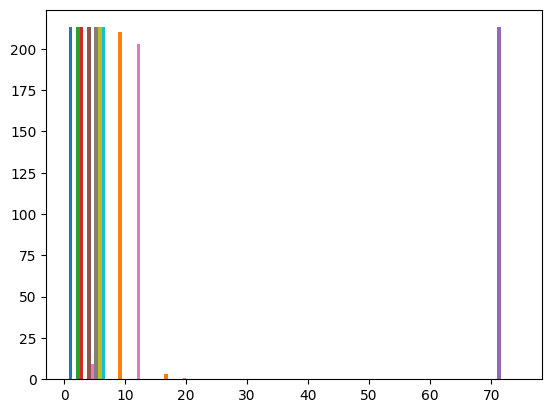

In [11]:
import matplotlib.pyplot as plt
plt.hist(data)
plt.show()

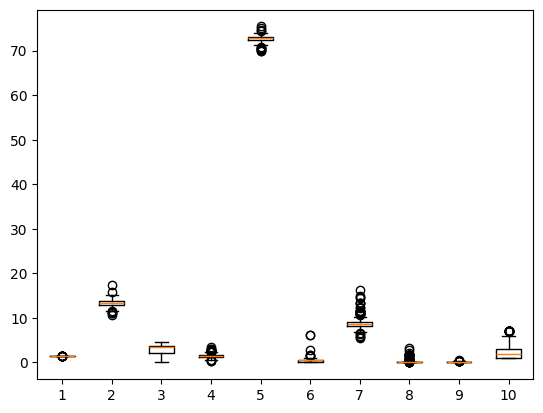

In [12]:
plt.boxplot(data)
plt.show()

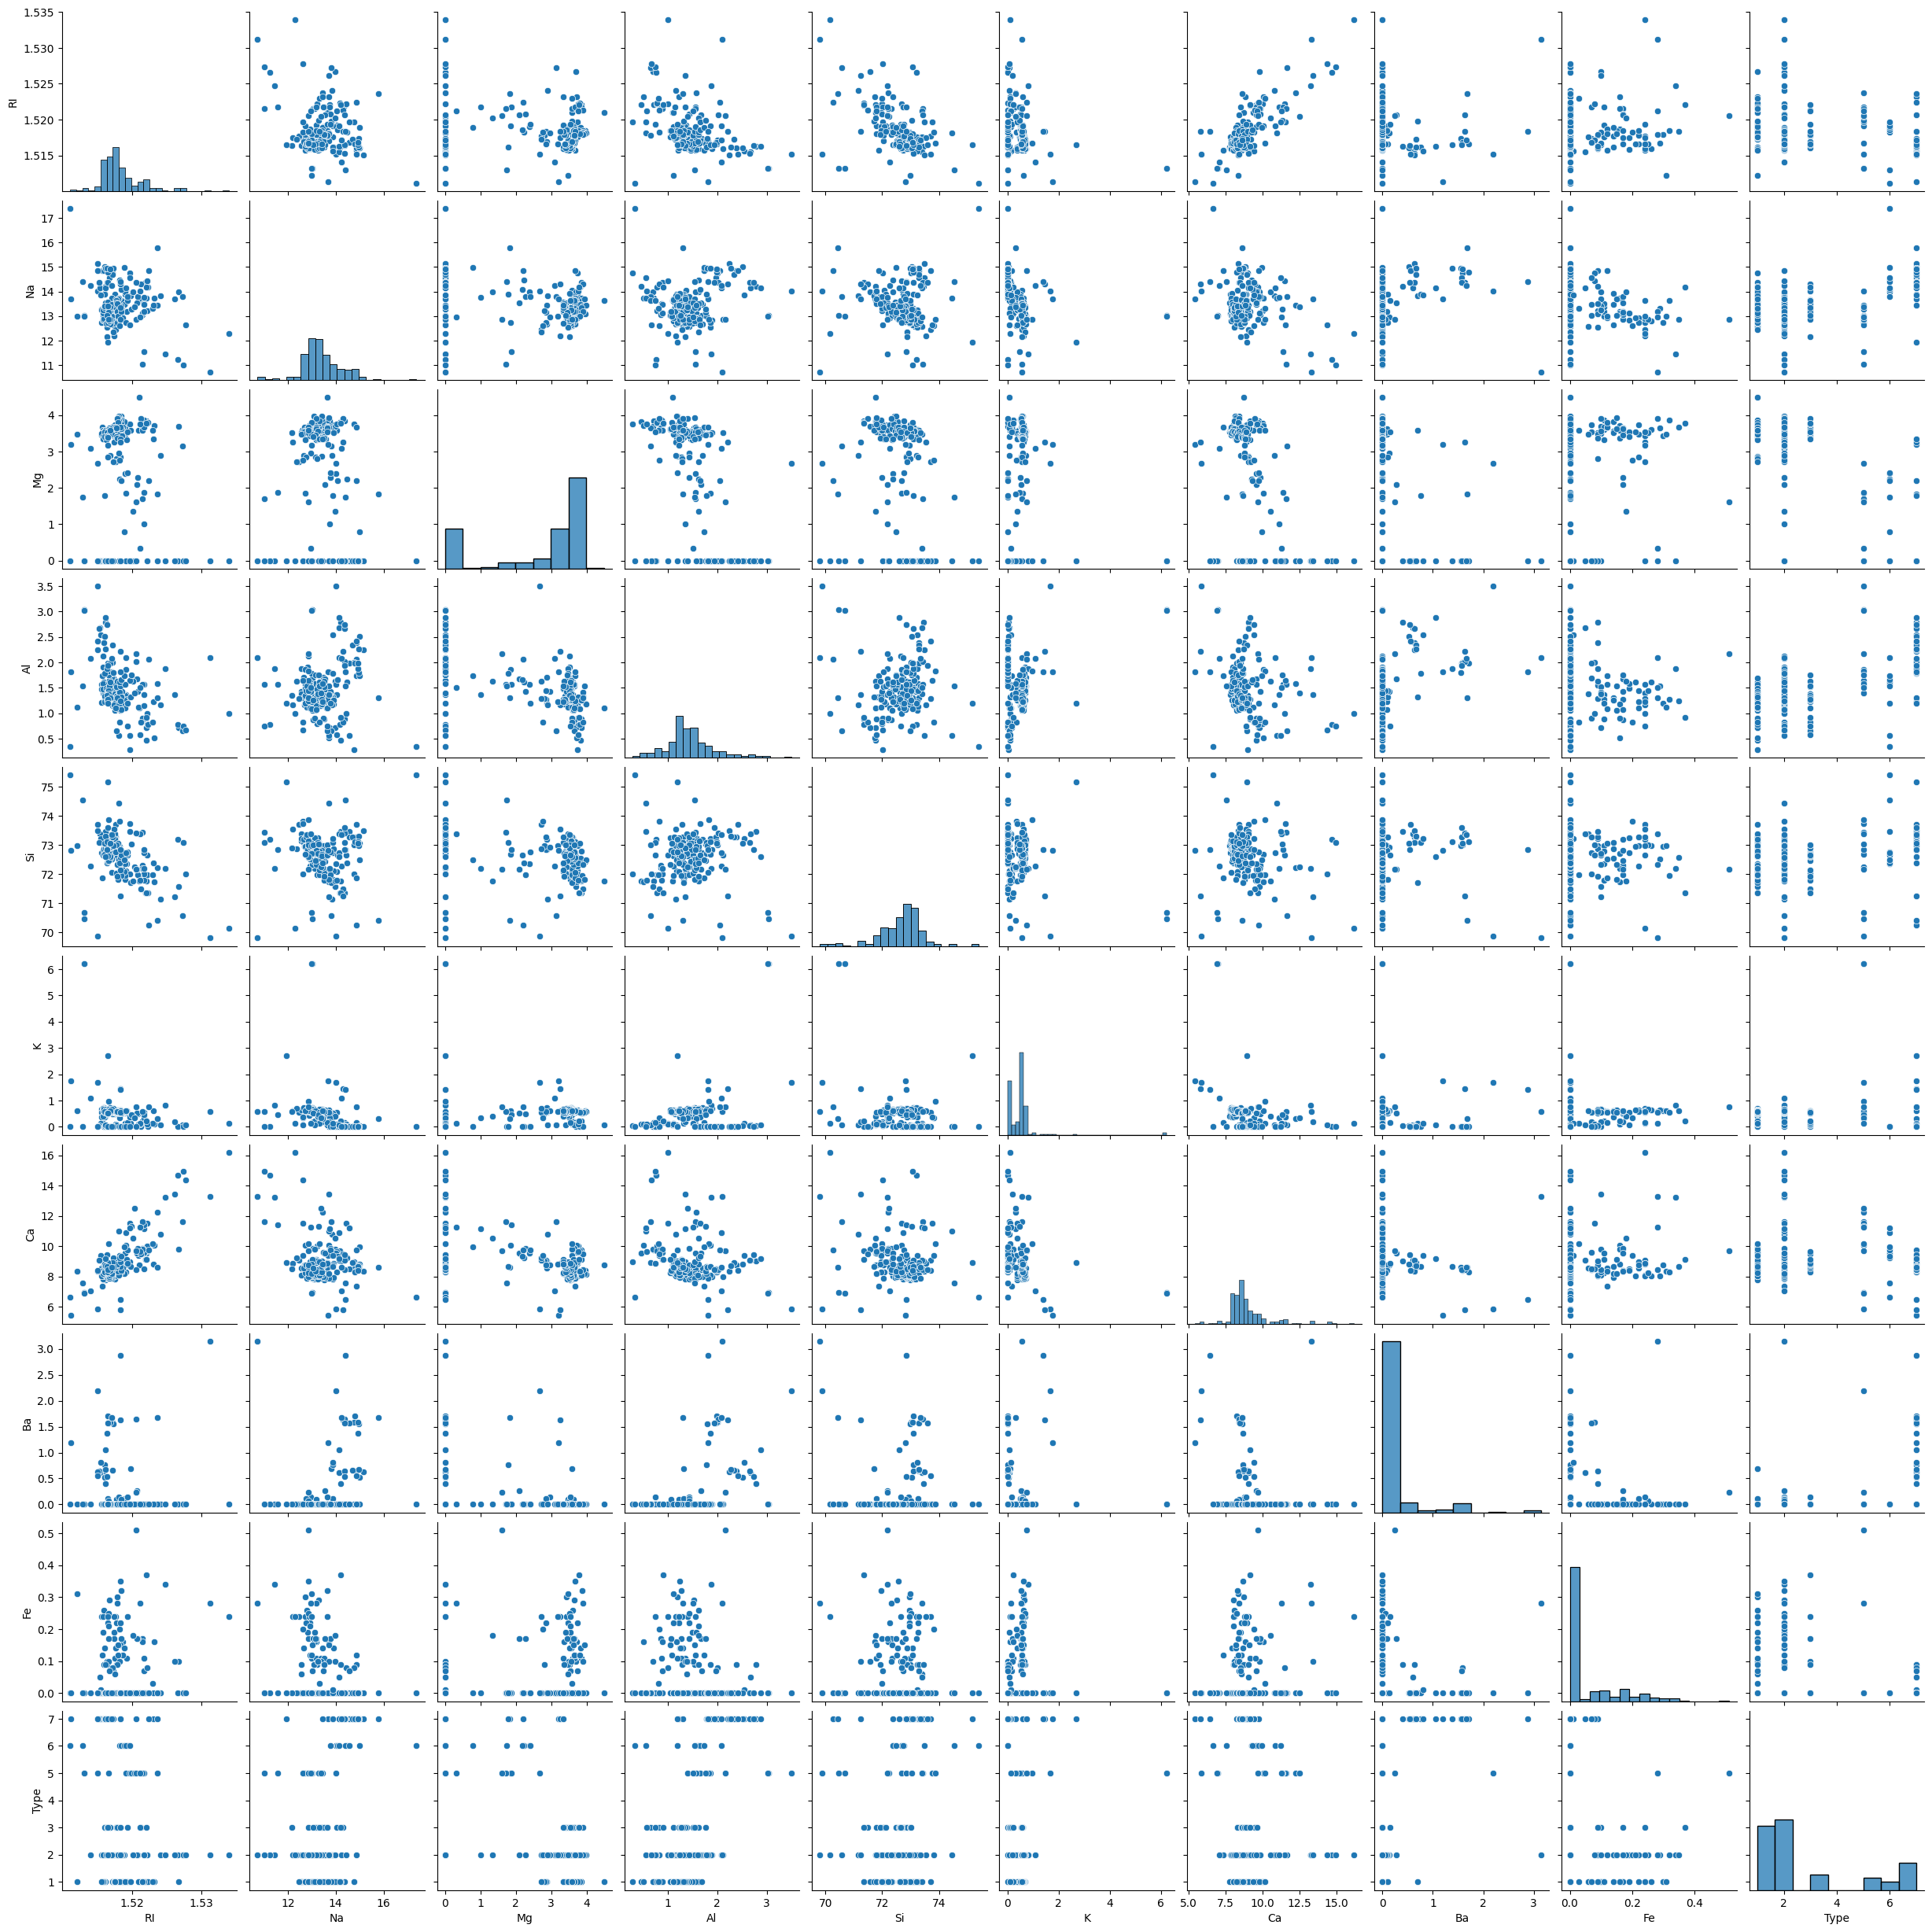

In [13]:
import seaborn as sns
sns.pairplot(data)

In [14]:
data.corr()

RI        Na        Mg        Al        Si         K        Ca  \
RI    1.000000 -0.198802 -0.127526 -0.400973 -0.539000 -0.287645  0.811183   
Na   -0.198802  1.000000 -0.278420  0.167735 -0.064885 -0.264158 -0.278194   
Mg   -0.127526 -0.278420  1.000000 -0.479575 -0.162437  0.007617 -0.446197   
Al   -0.400973  0.167735 -0.479575  1.000000 -0.016195  0.323683 -0.258068   
Si   -0.539000 -0.064885 -0.162437 -0.016195  1.000000 -0.197281 -0.207145   
K    -0.287645 -0.264158  0.007617  0.323683 -0.197281  1.000000 -0.317032   
Ca    0.811183 -0.278194 -0.446197 -0.258068 -0.207145 -0.317032  1.000000   
Ba    0.001679  0.329080 -0.491818  0.480642 -0.104389 -0.043653 -0.112208   
Fe    0.147083 -0.239374  0.085426 -0.080583 -0.097717 -0.009372  0.126314   
Type -0.160140  0.508837 -0.744195  0.597432  0.147725 -0.012455  0.002677   

            Ba        Fe      Type  
RI    0.001679  0.147083 -0.160140  
Na    0.329080 -0.239374  0.508837  
Mg   -0.491818  0.085426 -0.744195  
Al    0.480642 -0.080583  0.597432  
Si   -0.104389 -0.097717  0.147725  
K    -0.043653 -0.009372 -0.012455  
Ca   -0.112208  0.126314  0.002677  
Ba    1.000000 -0.059729  0.574896  
Fe   -0.059729  1.000000 -0.191090  
Type  0.574896 -0.191090  1.000000

<Axes: >

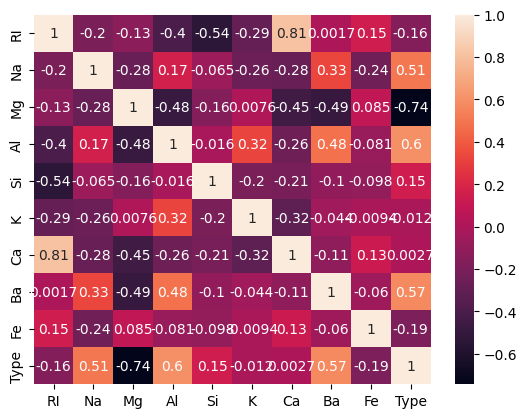

In [15]:
sns.heatmap(data.corr(),annot=True)

3.Data Preprocessing

In [16]:
label=LabelEncoder()
for column in data.select_dtypes(include=['object']).columns:
    data[column] = label[column].fit_transform(data[column])
data

RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0   1.0
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0   1.0
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0   1.0
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0   1.0
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0   1.0
..       ...    ...   ...   ...    ...   ...   ...   ...  ...   ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0   7.0
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0   7.0
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0   7.0
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0   7.0
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0   7.0

[213 rows x 10 columns]

In [17]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]
x,y

(          RI     Na    Mg    Al     Si     K    Ca    Ba   Fe
 0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0
 1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0
 2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0
 3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0
 4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0
 ..       ...    ...   ...   ...    ...   ...   ...   ...  ...
 209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0
 210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0
 211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0
 212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0
 213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0
 
 [213 rows x 9 columns],
 0      1.0
 1      1.0
 2      1.0
 3      1.0
 4      1.0
       ... 
 209    7.0
 210    7.0
 211    7.0
 212    7.0
 213    7.0
 Name: Type, Length: 213, dtype: float64)

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((170, 9), (170,), (43, 9), (43,))

In [19]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)
x_train,y_train

(array([[-0.88541869, -0.68469054,  0.53794711, ..., -0.71937041,
         -0.32871079, -0.57888487],
        [ 1.15976885,  0.92857052,  0.72707583, ...,  0.10531417,
         -0.32871079,  3.30297633],
        [ 2.65648929, -2.66184509, -2.02256475, ...,  4.01023088,
         -0.32871079, -0.57888487],
        ...,
        [-0.89202673, -0.22375881,  0.40701184, ..., -0.54315575,
         -0.32871079, -0.57888487],
        [-1.85349615,  1.18329596, -0.75685718, ..., -0.98721668,
         -0.32871079, -0.57888487],
        [ 2.85803443,  0.45550901,  0.2688024 , ...,  1.8674607 ,
         -0.32871079, -0.57888487]]),
 80     2.0
 162    3.0
 110    2.0
 128    2.0
 96     2.0
       ... 
 107    2.0
 14     1.0
 93     2.0
 180    6.0
 103    2.0
 Name: Type, Length: 170, dtype: float64)

4: Random Forest Model Implementation

In [20]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(x_train,y_train)


RandomForestClassifier(random_state=42)

In [21]:
# Predict the labels of the test set
y_pred = clf.predict(x_train)
y_pred

array([2., 3., 2., 2., 2., 2., 2., 1., 1., 1., 2., 1., 1., 7., 2., 5., 1.,
       1., 2., 1., 7., 5., 2., 1., 2., 6., 1., 1., 1., 1., 1., 2., 2., 3.,
       1., 2., 5., 2., 1., 3., 2., 2., 1., 2., 2., 2., 1., 2., 1., 3., 2.,
       2., 2., 2., 1., 7., 1., 1., 2., 2., 1., 1., 7., 6., 1., 1., 2., 7.,
       3., 1., 1., 2., 3., 2., 3., 2., 1., 1., 2., 3., 6., 1., 7., 5., 2.,
       5., 1., 1., 2., 1., 2., 1., 7., 3., 2., 1., 7., 1., 2., 5., 1., 3.,
       1., 2., 1., 2., 7., 5., 7., 1., 2., 1., 1., 2., 2., 2., 7., 7., 2.,
       1., 1., 1., 6., 2., 1., 5., 2., 7., 2., 6., 7., 1., 1., 2., 1., 5.,
       7., 5., 1., 1., 2., 1., 1., 3., 7., 7., 2., 1., 3., 7., 1., 1., 3.,
       2., 3., 2., 2., 2., 2., 2., 2., 7., 1., 7., 2., 2., 1., 2., 6., 2.])

In [22]:
accuracy = accuracy_score(y_test, clf.predict(x_test))
print("Accuracy:", accuracy)

Accuracy: 0.627906976744186


In [23]:
accuracy = accuracy_score(y_train, clf.predict(x_train))
print("Accuracy:", accuracy)

Accuracy: 1.0


In [24]:
print(classification_report(y_pred,y_train))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        59
         2.0       1.00      1.00      1.00        61
         3.0       1.00      1.00      1.00        14
         5.0       1.00      1.00      1.00        10
         6.0       1.00      1.00      1.00         6
         7.0       1.00      1.00      1.00        20

    accuracy                           1.00       170
   macro avg       1.00      1.00      1.00       170
weighted avg       1.00      1.00      1.00       170



In [25]:
print(classification_report(clf.predict(x_test),y_test))

              precision    recall  f1-score   support

         1.0       0.80      0.50      0.62        16
         2.0       0.67      0.59      0.62        17
         3.0       0.00      0.00      0.00         0
         5.0       0.33      0.50      0.40         2
         6.0       0.00      0.00      0.00         0
         7.0       0.89      1.00      0.94         8

    accuracy                           0.63        43
   macro avg       0.45      0.43      0.43        43
weighted avg       0.74      0.63      0.67        43



5: Bagging and Boosting Methods

In [26]:
# Boosting: AdaBoost Classifier
adb_clf = AdaBoostClassifier(n_estimators=100, random_state=42)
adb_clf.fit(x_train, y_train)
adb_pred = adb_clf.predict(x_test)
adb_accuracy = accuracy_score(y_test, adb_pred)
print("AdaBoost Classifier Accuracy:", adb_accuracy)

AdaBoost Classifier Accuracy: 0.46511627906976744



1. Explain Bagging and Boosting methods. How is it different from each other

Bagging :
Bagging involves training multiple instances of a base learning algorithm on different subsets of the training data, typically using random sampling with replacement (bootstrap sampling). Each model is trained independently, and then their predictions are combined through averaging (for regression) or voting (for classification). The idea behind bagging is to reduce variance and prevent overfitting by introducing diversity among the models. A popular example of bagging is the Random Forest algorithm, which uses bagging with decision trees as base learner

Boosting:
Boosting, on the other hand, involves training multiple weak learners sequentially, with each model trying to correct the mistakes made by its predecessor. Unlike bagging, where each model is trained independently, boosting learns from the mistakes of the previous models and gives more weight to the observations that were incorrectly predicted. Boosting algorithms typically assign different weights to the training instances based on their importance. Examples of boosting algorithms include AdaBoost (Adaptive Boosting), Gradient Boosting Machines (GBM), and XGBoost.s.

2. Explain how to handle imbalance in the data.
Resampling:
Over-sampling: Increase the number of instances in the minority class by duplicating or generating synthetic samples. Techniques like SMOTE (Synthetic Minority Over-sampling Technique) create synthetic samples by interpolating between existing minority class samples.
Under-sampling: Decrease the number of instances in the majority class by randomly removing samples. However, this can lead to loss of information. Care should be taken to preserve the representativeness of the dataset.
Algorithmic Approaches:
Use algorithms that are robust to class imbalance, such as tree-based algorithms like Random Forest or gradient boosting machines (e.g., XGBoost, LightGBM). These algorithms are less sensitive to class imbalance because they partition the feature space based on class purity.
Utilize ensemble techniques like bagging and boosting, which can handle imbalanced data more effectively by combining multiple weak learners.
Cost-sensitive Learning:
Adjust the misclassification costs associated with different classes. By assigning higher misclassification costs to minority classes, classifiers can learn to prioritize correctly classifying these instances.
Some algorithms, like SVM (Support Vector Machines) and decision trees, allow for specifying class weights to penalize misclassification of minority classes.
Evaluation Metrics:
Choose appropriate evaluation metrics that are sensitive to class imbalance. Accuracy is not suitable for imbalanced datasets since it can be misleading. Instead, use metrics like precision, recall, F1-score, ROC-AUC (Receiver Operating Characteristic - Area Under the Curve), and PR-AUC (Precision-Recall Area Under the Curve).
Data Preprocessing:
Normalize or standardize the data to ensure that features are on a similar scale. This can help algorithms converge faster and perform better, especially for distance-based algorithms like SVM.
Feature engineering can also help in creating informative features that better discriminate between classes.
Ensemble Methods:
Ensemble methods like bagging and boosting can also be effective in handling imbalanced data. By combining multiple models trained on different subsets of the data, these methods can reduce the impact of class imbalance on model performance.
Advanced Techniques:
Deep learning techniques like attention mechanisms, class weighting, and focal loss have been developed to address imbalanced data in neural networks specifically.
Cost-sensitive learning algorithms, such as cost-sensitive SVM or cost-sensitive decision trees, explicitly consider the misclassification costs associated with different classes.